*Task*

Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

1) Build a deep learning model to predict churn rate at bank. 

2) Once model is built, print classification report and analyze precision, recall and f1-score 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [3]:
import io

df = pd.read_csv(io.BytesIO(uploaded["Churn_Modelling.csv"]))
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9915,9916,15813140,Taylor,543,Spain,Male,41,5,0.00,2,0,1,143980.29,0
9032,9033,15658435,Hingston,781,France,Female,27,5,0.00,2,0,0,72969.90,0
7019,7020,15699839,Hall,637,France,Male,36,2,152606.82,1,1,1,71692.80,0
6716,6717,15805676,Hsu,515,Spain,Male,29,4,151012.55,2,1,0,9770.97,0
9106,9107,15663650,Russell,698,Germany,Male,52,10,107304.39,3,1,0,28806.32,1
7958,7959,15802483,Hancock,686,France,Male,34,6,146178.13,2,1,1,88837.11,0
1109,1110,15616330,Liao,595,France,Male,31,4,0.00,2,1,0,189995.86,0
3364,3365,15763544,Thompson,673,France,Male,47,1,0.00,2,0,0,108762.16,0
8112,8113,15623966,Yermakov,578,France,Female,35,2,0.00,2,0,1,26389.92,0
1293,1294,15687752,Griffin,641,France,Male,30,2,87505.47,2,0,1,7278.57,0


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Feature Engineering

In [5]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [6]:
# daata exploration
df.drop(["RowNumber", "CustomerId", "Surname"], axis= "columns", inplace= True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
# look for null values
df.sum().isnull()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [9]:
df.shape

(10000, 11)

In [10]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
# see specific index summary
df.iloc[409]

CreditScore              537
Geography            Germany
Gender                Female
Age                       41
Tenure                     3
Balance            138306.34
NumOfProducts              1
HasCrCard                  1
IsActiveMember             0
EstimatedSalary    106761.47
Exited                     0
Name: 409, dtype: object

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


some data visualization

In [13]:
# see customers wo are leaving and their tenure
tenure_exit_no = df[df.Exited== 0].Tenure
tenure_exit_yes= df[df.Exited== 1].Tenure

In [14]:
tenure_exit_no.head()

1    1
3    1
4    2
6    7
8    4
Name: Tenure, dtype: int64

In [15]:
tenure_exit_yes.head()

0     2
2     8
5     8
7     4
16    1
Name: Tenure, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


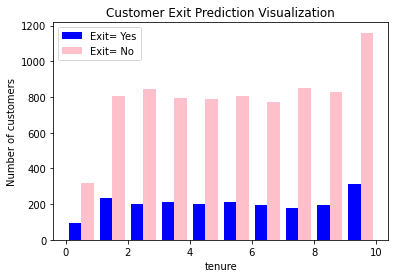

In [16]:
# visualization using histogram for tenure vs exit
plt.xlabel("tenure")
plt.ylabel("Number of customers")
plt.title("Customer Exit Prediction Visualization")
plt.hist([tenure_exit_yes, tenure_exit_no], color= ["blue", "pink"], label= ["Exit= Yes", "Exit= No"])
plt.legend()

In [17]:
df.sample(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
870,535,France,Female,40,8,0.0,1,1,1,27689.77,0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


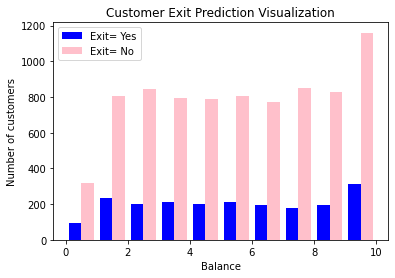

In [18]:
# similar plot for account balance
b_exit_no = df[df.Exited== 0].Balance
b_exit_yes= df[df.Exited== 1].Balance

# histogram
plt.xlabel("Balance")
plt.ylabel("Number of customers")
plt.title("Customer Exit Prediction Visualization")
plt.hist([tenure_exit_yes, tenure_exit_no], color= ["blue", "pink"], label= ["Exit= Yes", "Exit= No"])
plt.legend()

In [19]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [21]:
# show columns with dtypes= object
# find unique values then do one hot encoding
for column in df:
  if df[column].dtypes == "object":
    print(f'{column} : {df[column].unique()}')


Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [22]:
# create a function for doing the above
def print_unique(df):
  for column in df:
    if df[column].dtypes == "object":
      print(f'{column} : {df[column].unique()}')

In [23]:
print_unique(df)

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [28]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [31]:
# Dealing with Gender
# convert male and female to 0 and 1 respectively
df.Gender.replace({"Female": 1, "Male": 0}, inplace= True)
df.Gender.unique()

array([1, 0])

In [34]:
df.Gender.dtype

dtype('int64')

use one hot encoding for columns with more than two unique text values

In [37]:
df1 = pd.get_dummies(data= df, columns= ["Geography"])
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [38]:
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [41]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
2504,619,1,45,0,0.00,2,0,0,113645.40,0,0,0,1
4508,599,1,41,1,0.00,2,1,0,96069.82,0,1,0,0
7598,430,1,60,7,73937.02,1,1,0,161937.62,1,1,0,0
6297,807,1,34,1,0.00,1,0,0,114448.13,0,1,0,0
7470,850,1,47,4,99219.47,2,1,1,122141.13,0,0,1,0


In [42]:
# check datatypes
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [43]:
df1.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.454300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [44]:
# print unique values
for col in df1:
    print(f'{col}: {df1[col].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

# Scaling

use sklearn minmax scaler

In [45]:
cols_to_scale = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [46]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
5491,0.460,1,0.243243,0.6,0.579468,0.333333,1,1,0.849839,1,0,1,0
2893,0.614,0,0.432432,0.9,0.000000,0.333333,0,0,0.185817,0,1,0,0
6595,0.502,0,0.081081,0.7,0.000000,0.333333,0,0,0.723313,0,0,0,1
849,0.710,0,0.094595,0.0,0.388781,0.000000,0,1,0.299406,0,1,0,0
283,0.914,0,0.324324,0.7,0.471405,0.000000,1,1,0.129383,0,1,0,0


In [47]:
# print unique values
for col in df1:
    print(f'{col}: {df1[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

create ann

In [48]:
# create X and y
X = df1.drop("Exited", axis= "columns")
y = df1.Exited

In [49]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1


In [50]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [54]:
#  train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 5)

In [55]:
X_train.shape

(8000, 12)

In [56]:
X_train.shape

(8000, 12)

In [57]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,1,0.283784,0.6,0.000000,0.333333,0,0,0.096273,0,0,1
4154,0.752,0,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0
3881,0.476,1,0.621622,0.3,0.000000,0.000000,1,1,0.948551,1,0,0
9238,0.846,1,0.432432,0.4,0.000000,0.333333,1,0,0.646869,1,0,0
5210,0.402,0,0.229730,0.7,0.517012,0.333333,0,0,0.434670,1,0,0
7487,0.602,1,0.513514,0.4,0.000000,0.000000,0,0,0.421898,1,0,0
7542,0.314,1,0.216216,0.4,0.000000,0.333333,1,1,0.303413,0,0,1
7524,0.620,1,0.297297,0.8,0.666330,0.000000,1,1,0.925815,1,0,0
9412,0.750,0,0.108108,0.6,0.393324,0.000000,0,0,0.668609,1,0,0
6377,0.684,0,0.202703,0.9,0.000000,0.000000,1,0,0.567526,1,0,0


In [60]:
len(df.columns)

11

In [61]:
len(df1.columns)

13

In [62]:
len(X_train.columns)

12

In [63]:
import tensorflow as tf
from tensorflow import keras

In [66]:
# create ann model

model = keras.Sequential([
                          keras.layers.Dense(20, input_shape= (12,), activation= "relu"),
                          keras.layers.Dense(1, activation= "sigmoid")
])

model.compile(optimizer= "adam",
              loss= "binary_crossentropy",
              metrics= ["accuracy"])


model.fit(X_train, y_train, epochs= 100)

Epoch 1/100
250/250 [==============================] - 1s 989us/step - loss: 0.4998 - accuracy: 0.7937
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4673 - accuracy: 0.7986
Epoch 3/100
250/250 [==============================] - 0s 976us/step - loss: 0.4569 - accuracy: 0.8037
Epoch 4/100
250/250 [==============================] - 0s 958us/step - loss: 0.4479 - accuracy: 0.8070
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4399 - accuracy: 0.8095
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4330 - accuracy: 0.8111
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.8151
Epoch 8/100
250/250 [==============================] - 0s 957us/step - loss: 0.4199 - accuracy: 0.8170
Epoch 9/100
250/250 [==============================] - 0s 960us/step - loss: 0.4139 - accuracy: 0.8188
Epoch 10/100
250/250 [==============================] - 0s 975us/step - loss: 0.4

In [68]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8545


[0.35342785716056824, 0.8544999957084656]

In [73]:
# test model
yp = model.predict(X_test)
yp[:10]

array([[0.03473428],
       [0.08925861],
       [0.08742496],
       [0.11250982],
       [0.06849793],
       [0.12756354],
       [0.02048695],
       [0.3189533 ],
       [0.01936996],
       [0.9479656 ]], dtype=float32)

In [74]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [76]:
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [77]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

classification report, f1 score and confusion matrix

In [78]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.72      0.46      0.56       405

    accuracy                           0.85      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Truth')

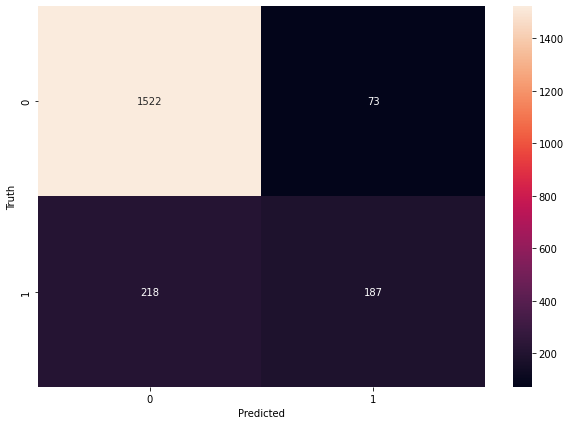

In [82]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels= y_test, predictions= y_pred)



plt.figure(figsize= (10,7))
sn.heatmap(cm, annot= True, fmt= "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")